In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_csv('weatherAUS.csv')


C:\Users\Vibuzz\AppData\Local\Temp\ipykernel_14756\4212842004.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


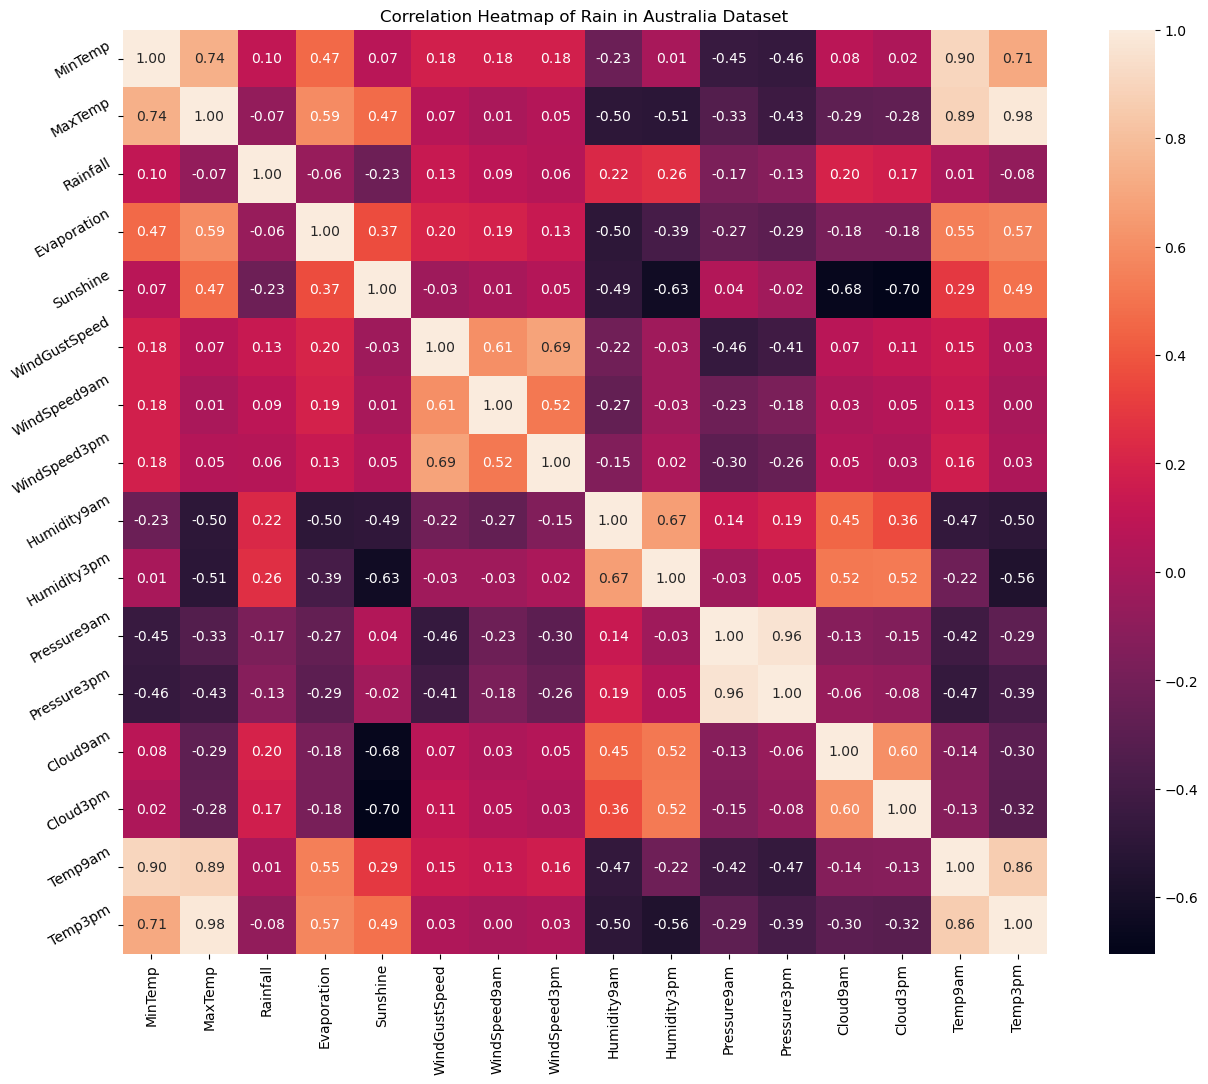

In [3]:
correlation = data.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [9]:
missind=(data.isnull().sum() / len(data)) * 100
missind

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [10]:
missing_val=pd.DataFrame(data.isnull().sum()).reset_index()
#missing_val.rename(columns=={"index":'Location',0:"Count"})
A=missing_val.sort_values(by=0)
#missing_val
missingval1=A.rename(columns={"index":'Location',0:"count"})
missingval=missingval1.rename(columns={"index":'Location',0:"count"})
missingval

,Location,count
0,Date,0
1,Location,0
3,MaxTemp,1261
2,MinTemp,1485
19,Temp9am,1767
11,WindSpeed9am,1767
13,Humidity9am,2654
12,WindSpeed3pm,3062
4,Rainfall,3261
21,RainToday,3261


In [11]:
missingval=missingval.rename(columns={"index":'Location',0:"count"})
missingval

,Location,count
0,Date,0
1,Location,0
3,MaxTemp,1261
2,MinTemp,1485
19,Temp9am,1767
11,WindSpeed9am,1767
13,Humidity9am,2654
12,WindSpeed3pm,3062
4,Rainfall,3261
21,RainToday,3261


Text(0.5, 1.0, 'Missing Values')

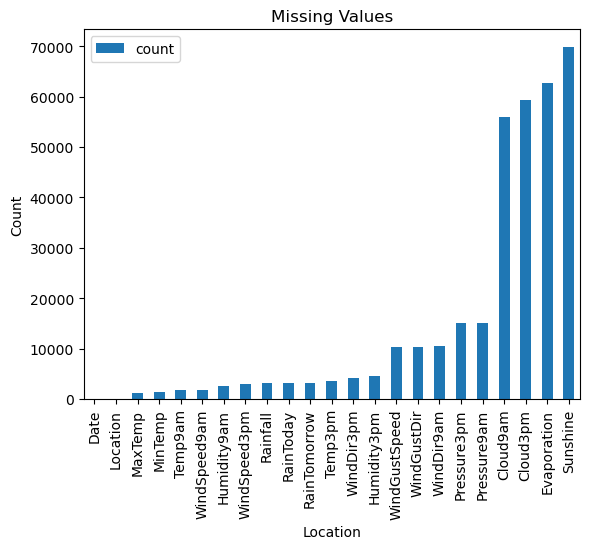

In [12]:
missingval.plot(x="Location",y='count',kind='bar')
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Missing Values")

In [13]:
data.shape

(145460, 23)

In [14]:
variables_drop = missind[missind > 30].index
variables_drop

Index(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], dtype='object')

In [15]:
dropped1 = data.drop(variables_drop, axis=1)

In [16]:
dropped1.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [17]:
df=dropped1.drop('Date',axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [18]:
#df[['RainToday','RainTomorrow']] = df[['RainToday','RainTomorrow']].map({'yes': 1, 'no': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})



In [19]:
df.shape

(140787, 18)

In [20]:
df['RainTomorrow'].value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

C:\Users\Vibuzz\AppData\Local\Temp\ipykernel_14756\1321068535.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

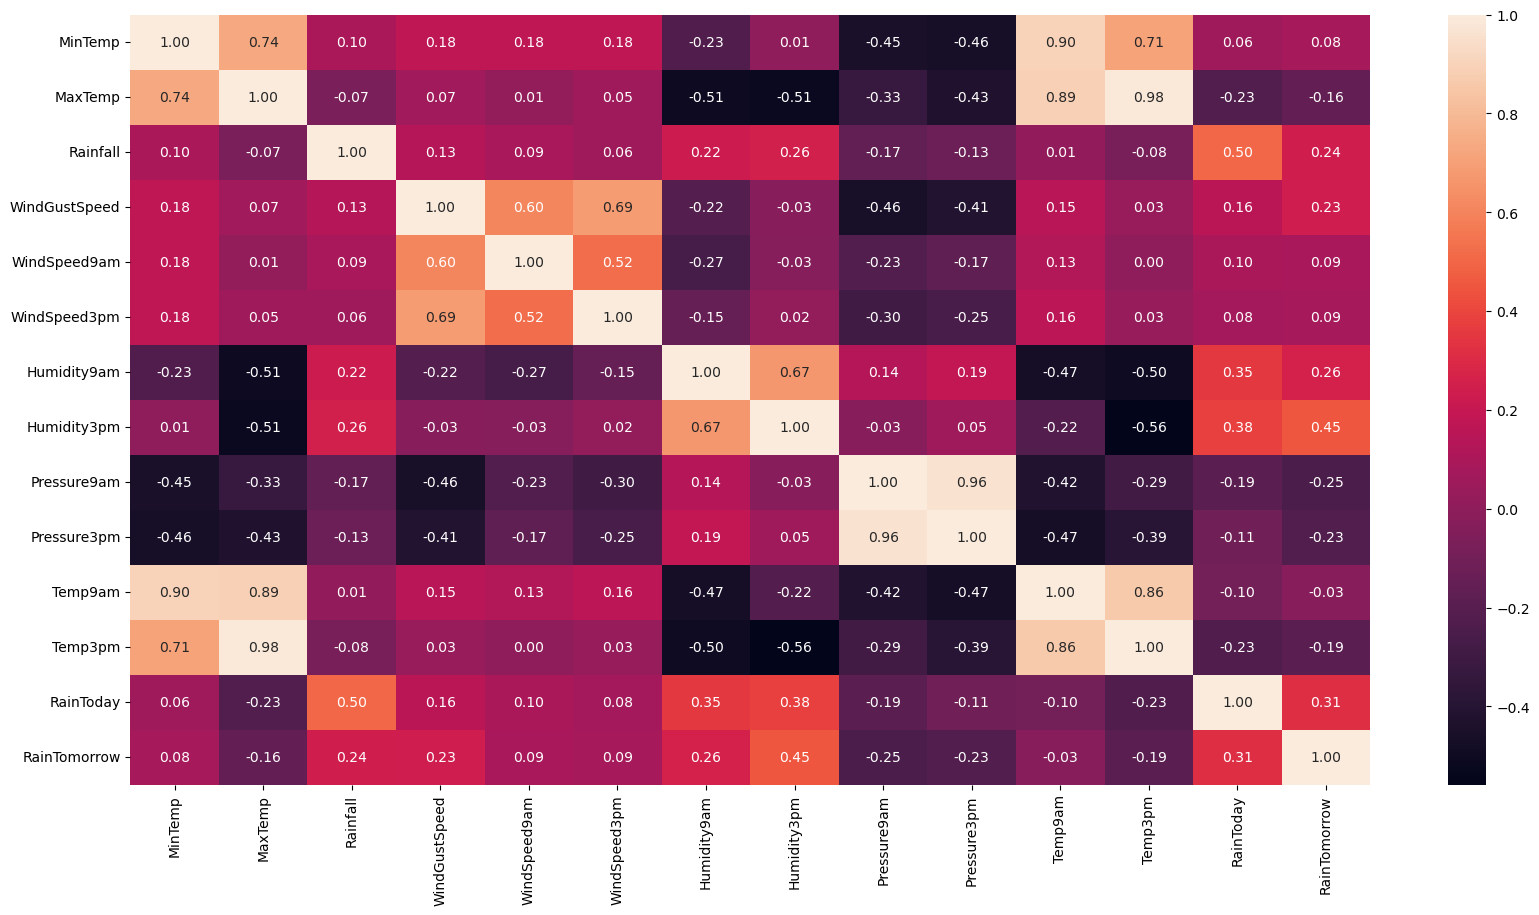

In [21]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f')

In [22]:
l1=list(df.select_dtypes(include=['int64','float64']))
l1

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [23]:
df_numerical=df.select_dtypes(include=['int64','float64'])
df_numerical.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [24]:
df_numerical.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,140319.000000,140480.00000,140787.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,140131.000000,138163.000000,140787.000000,140787.000000
mean,12.184824,23.23512,2.349974,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,16.987066,21.693183,0.223423,0.221618
std,6.403879,7.11450,8.465173,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,6.496012,6.937784,0.416541,0.415337
min,-8.500000,-4.80000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000
25%,7.600000,17.90000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,12.300000,16.600000,0.000000,0.000000
50%,12.000000,22.60000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,0.000000,0.000000
75%,16.800000,28.30000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,0.000000,0.000000
max,33.900000,48.10000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


([<matplotlib.axis.XTick at 0x122a4518370>,
 [Text(0, 0, 'MinTemp'),
  Text(1, 0, 'MaxTemp'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'WindGustSpeed'),
  Text(4, 0, 'WindSpeed9am'),
  Text(5, 0, 'WindSpeed3pm'),
  Text(6, 0, 'Humidity9am'),
  Text(7, 0, 'Humidity3pm'),
  Text(8, 0, 'Pressure9am'),
  Text(9, 0, 'Pressure3pm'),
  Text(10, 0, 'Temp9am'),
  Text(11, 0, 'Temp3pm'),
  Text(12, 0, 'RainToday'),
  Text(13, 0, 'RainTomorrow')])

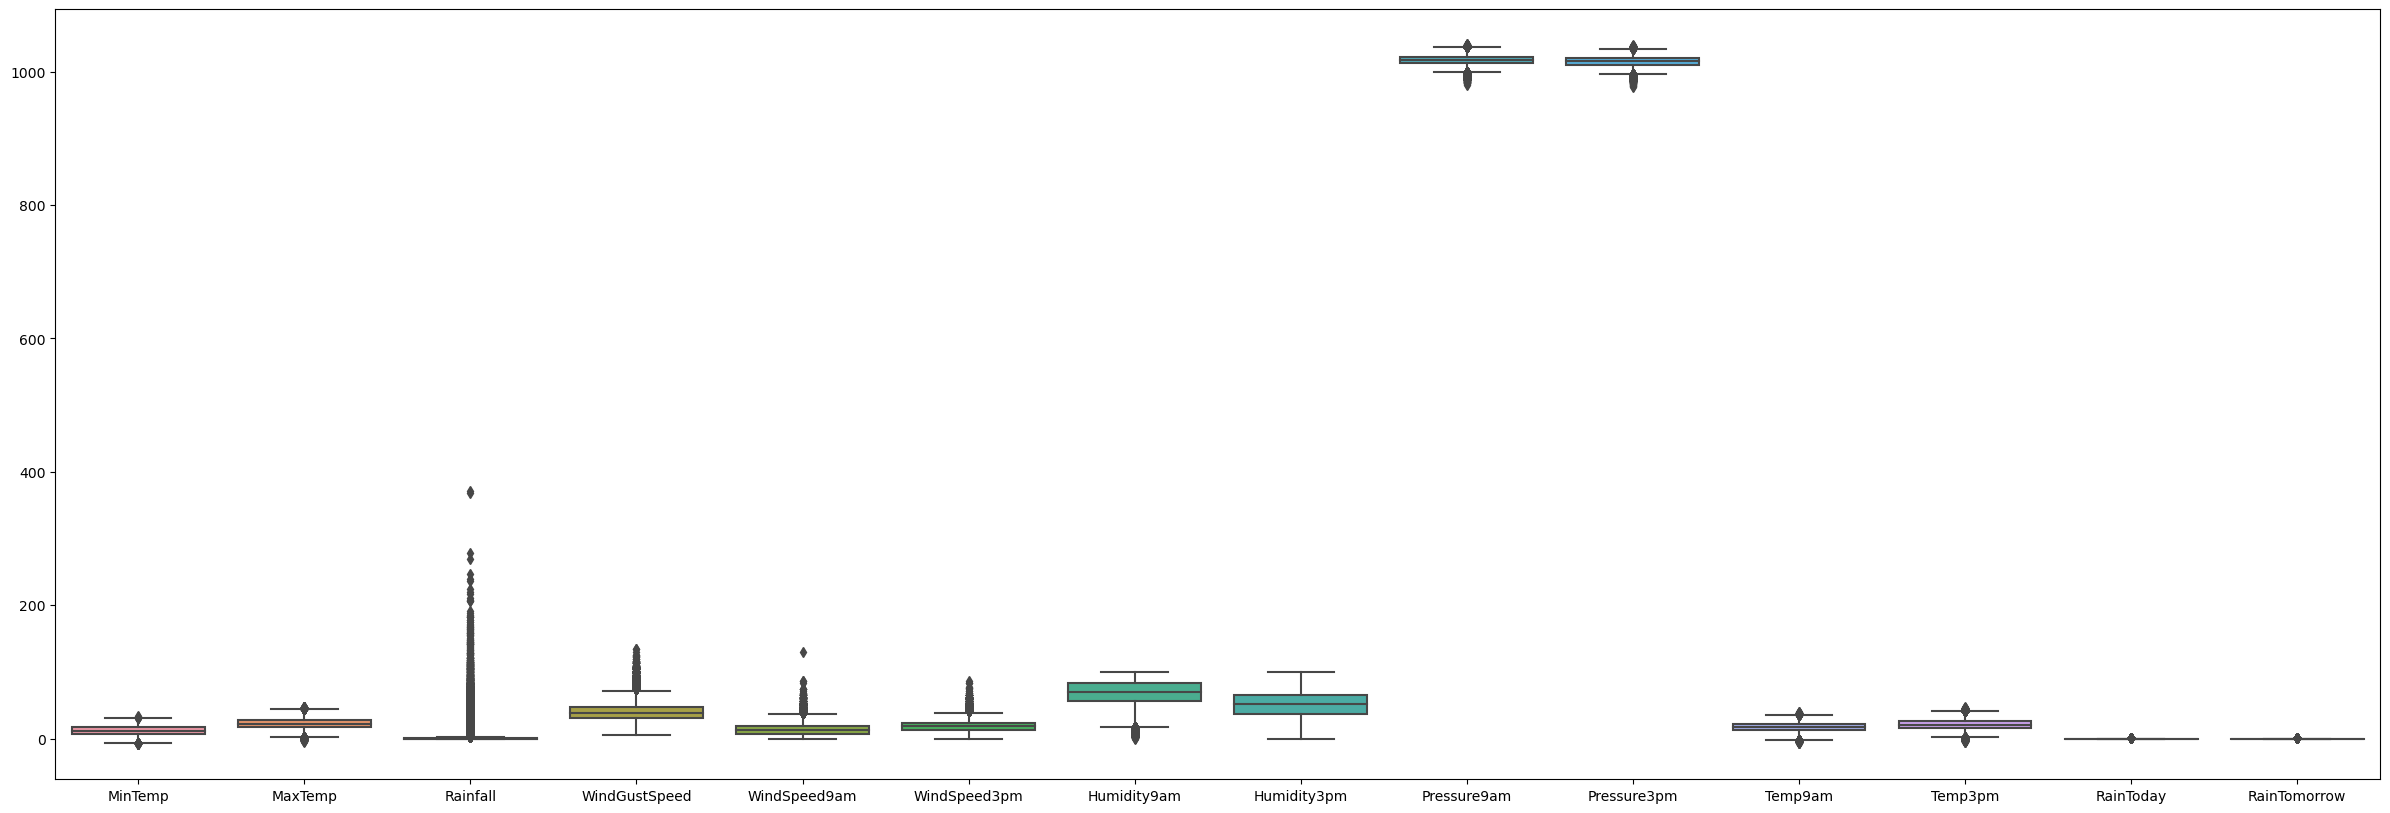

In [25]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df_numerical)

# Set the labels for the x-axis (column names)
plt.xticks(range(len(df_numerical.columns)), df_numerical.columns)

In [26]:
categorical=list(df.select_dtypes(include=['object']))
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [27]:
df_categorical=df.select_dtypes(include=['object'])

In [28]:
for i in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df_categorical[i].fillna(df_categorical[i].mode()[0], inplace=True)

In [29]:
df_categorical.isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [30]:
df_categorical

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW
...,...,...,...,...
145454,Uluru,E,ESE,E
145455,Uluru,E,SE,ENE
145456,Uluru,NNW,SE,N
145457,Uluru,N,SE,WNW


In [31]:
df_categorical_dummie=pd.get_dummies(df_categorical,drop_first=True)
df_categorical_dummie.columns

Index(['Location_Albany', 'Location_Albury', 'Location_AliceSprings',
       'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor',
       'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart',
       'Location_Katherine', 'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle',
       'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Richmond', 'Location_Sale', 'Location_SalmonGums',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWa

In [32]:
df_categorical_dummie

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
for i in df_numerical.columns:
    df_numerical.fillna(df_numerical[i].mean(),inplace=True)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_numerical_scaled=scaler.fit_transform(df_numerical)

In [35]:
df_numerical_scaled

array([[0.51650943, 0.52362949, 0.00161725, ..., 0.52207294, 0.        ,
        0.        ],
       [0.375     , 0.56521739, 0.        , ..., 0.57005758, 0.        ,
        0.        ],
       [0.50471698, 0.57655955, 0.        , ..., 0.54894434, 0.        ,
        0.        ],
       ...,
       [0.28537736, 0.56899811, 0.        , ..., 0.57389635, 0.        ,
        0.        ],
       [0.32783019, 0.59924386, 0.        , ..., 0.60460653, 0.        ,
        0.        ],
       [0.38443396, 0.60113422, 0.        , ..., 0.60268714, 0.        ,
        0.        ]])

In [36]:
df_numerical_scaled=pd.DataFrame(df_numerical_scaled,columns=df_numerical.columns)
df_numerical_scaled

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.516509,0.523629,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.967633,0.968367,0.508439,0.522073,0.0,0.0
1,0.375000,0.565217,0.000000,0.294574,0.030769,0.252874,0.44,0.25,0.970451,0.969049,0.514768,0.570058,0.0,0.0
2,0.504717,0.576560,0.000000,0.310078,0.146154,0.298851,0.38,0.30,0.967535,0.969925,0.594937,0.548944,0.0,0.0
3,0.417453,0.620038,0.000000,0.139535,0.084615,0.103448,0.45,0.16,0.977255,0.973915,0.533755,0.612284,0.0,0.0
4,0.613208,0.701323,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.970646,0.967297,0.527426,0.673704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0.283019,0.502836,0.000000,0.193798,0.115385,0.149425,0.59,0.27,0.984157,0.982091,0.350211,0.504798,0.0,0.0
140783,0.266509,0.533081,0.000000,0.193798,0.100000,0.126437,0.51,0.24,0.984059,0.981215,0.364979,0.533589,0.0,0.0
140784,0.285377,0.568998,0.000000,0.124031,0.100000,0.103448,0.56,0.21,0.982990,0.980047,0.381857,0.573896,0.0,0.0
140785,0.327830,0.599244,0.000000,0.240310,0.069231,0.103448,0.53,0.24,0.980560,0.977808,0.415612,0.604607,0.0,0.0


([<matplotlib.axis.XTick at 0x122ac799e10>,
 [Text(0, 0, 'MinTemp'),
  Text(1, 0, 'MaxTemp'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'WindGustSpeed'),
  Text(4, 0, 'WindSpeed9am'),
  Text(5, 0, 'WindSpeed3pm'),
  Text(6, 0, 'Humidity9am'),
  Text(7, 0, 'Humidity3pm'),
  Text(8, 0, 'Pressure9am'),
  Text(9, 0, 'Pressure3pm'),
  Text(10, 0, 'Temp9am'),
  Text(11, 0, 'Temp3pm'),
  Text(12, 0, 'RainToday'),
  Text(13, 0, 'RainTomorrow')])

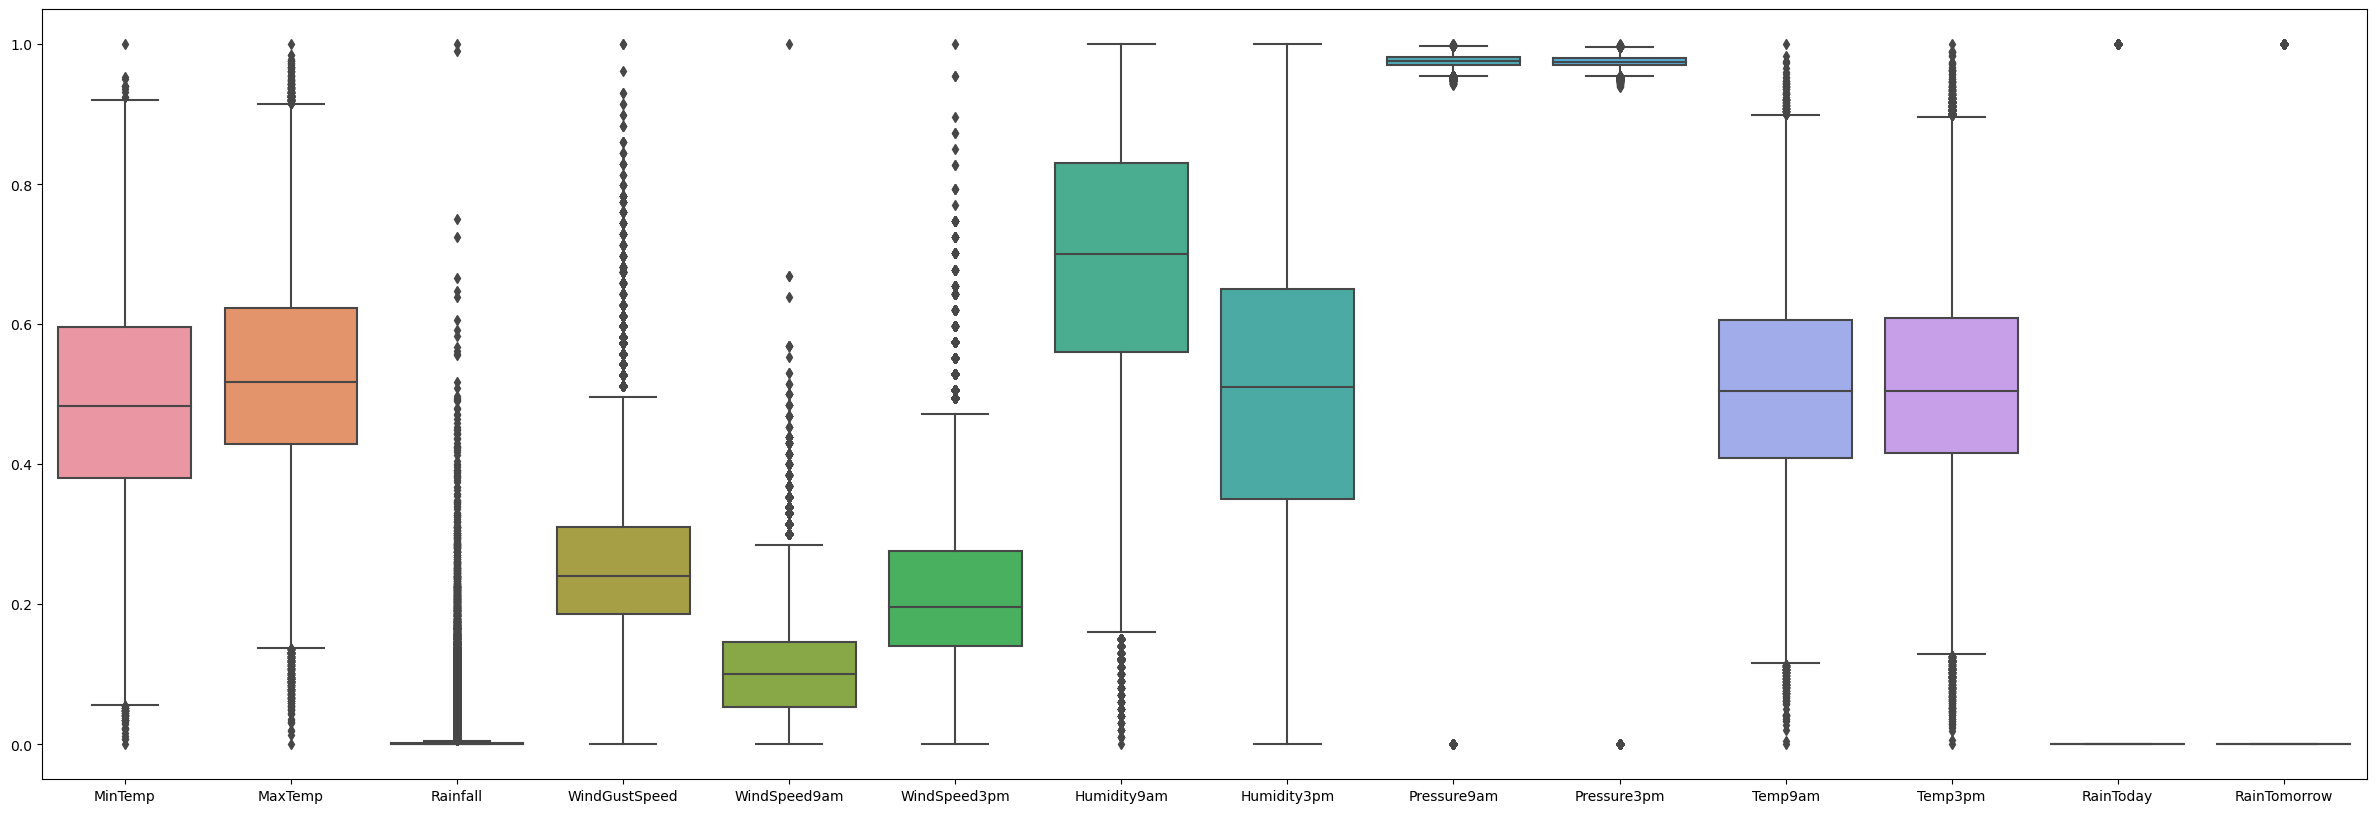

In [37]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df_numerical_scaled)

# Set the labels for the x-axis (column names)
plt.xticks(range(len(df_numerical_scaled.columns)), df_numerical_scaled.columns)

In [38]:
df_scaled= df_numerical_scaled
df_scaled

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.516509,0.523629,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.967633,0.968367,0.508439,0.522073,0.0,0.0
1,0.375000,0.565217,0.000000,0.294574,0.030769,0.252874,0.44,0.25,0.970451,0.969049,0.514768,0.570058,0.0,0.0
2,0.504717,0.576560,0.000000,0.310078,0.146154,0.298851,0.38,0.30,0.967535,0.969925,0.594937,0.548944,0.0,0.0
3,0.417453,0.620038,0.000000,0.139535,0.084615,0.103448,0.45,0.16,0.977255,0.973915,0.533755,0.612284,0.0,0.0
4,0.613208,0.701323,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.970646,0.967297,0.527426,0.673704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0.283019,0.502836,0.000000,0.193798,0.115385,0.149425,0.59,0.27,0.984157,0.982091,0.350211,0.504798,0.0,0.0
140783,0.266509,0.533081,0.000000,0.193798,0.100000,0.126437,0.51,0.24,0.984059,0.981215,0.364979,0.533589,0.0,0.0
140784,0.285377,0.568998,0.000000,0.124031,0.100000,0.103448,0.56,0.21,0.982990,0.980047,0.381857,0.573896,0.0,0.0
140785,0.327830,0.599244,0.000000,0.240310,0.069231,0.103448,0.53,0.24,0.980560,0.977808,0.415612,0.604607,0.0,0.0


In [39]:
df_scaled['RainTomorrow'].value_counts()

0.0    109586
1.0     31201
Name: RainTomorrow, dtype: int64

In [40]:
scaled=df_scaled.drop(["RainToday",'RainTomorrow'],axis=1)
rain=df_scaled[["RainToday",'RainTomorrow']]

In [41]:
scaled.shape

(140787, 12)

In [42]:
def remove_outliers_zscore(column, threshold=3):
    z_scores = (column - np.mean(column)) / np.std(column)
    outliers = np.abs(z_scores) > threshold
    cleaned_column = column[~outliers]
    return cleaned_column

def remove_outliers_iqr(column, threshold=1.5):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    outliers = (column < lower_bound) | (column > upper_bound)
    cleaned_column = column[~outliers]
    return cleaned_column

def remove_outliers_dataframe(df, method='zscore', threshold=1.5):
    cleaned_df = pd.DataFrame()
    for column in df.columns:
        if method == 'zscore':
            cleaned_column = remove_outliers_zscore(df[column], threshold)
        elif method == 'iqr':
            cleaned_column = remove_outliers_iqr(df[column], threshold)
        else:
            raise ValueError('Invalid method. Choose either "zscore" or "iqr".')
        cleaned_df[column] = cleaned_column
    return cleaned_df


In [43]:
# Remove outliers using z-score method
cleaned_df = remove_outliers_dataframe(scaled, method='iqr',threshold=1.5)

print(cleaned_df)


         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.516509  0.523629  0.001617       0.294574      0.153846   
1       0.375000  0.565217  0.000000       0.294574      0.030769   
2       0.504717  0.576560  0.000000       0.310078      0.146154   
3       0.417453  0.620038  0.000000       0.139535      0.084615   
4       0.613208  0.701323  0.002695       0.271318      0.053846   
...          ...       ...       ...            ...           ...   
140782  0.283019  0.502836  0.000000       0.193798      0.115385   
140783  0.266509  0.533081  0.000000       0.193798      0.100000   
140784  0.285377  0.568998  0.000000       0.124031      0.100000   
140785  0.327830  0.599244  0.000000       0.240310      0.069231   
140786  0.384434  0.601134  0.000000       0.170543      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.275862         0.71         0.22     0.967633     0.968367   
1           0.25287

In [44]:
cleanedpd =pd.DataFrame(cleaned_df)
cleanedpd

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.967633,0.968367,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.294574,0.030769,0.252874,0.44,0.25,0.970451,0.969049,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.310078,0.146154,0.298851,0.38,0.30,0.967535,0.969925,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.139535,0.084615,0.103448,0.45,0.16,0.977255,0.973915,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.970646,0.967297,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0.283019,0.502836,0.000000,0.193798,0.115385,0.149425,0.59,0.27,0.984157,0.982091,0.350211,0.504798
140783,0.266509,0.533081,0.000000,0.193798,0.100000,0.126437,0.51,0.24,0.984059,0.981215,0.364979,0.533589
140784,0.285377,0.568998,0.000000,0.124031,0.100000,0.103448,0.56,0.21,0.982990,0.980047,0.381857,0.573896
140785,0.327830,0.599244,0.000000,0.240310,0.069231,0.103448,0.53,0.24,0.980560,0.977808,0.415612,0.604607


In [45]:
cleanedpd.shape

(140723, 12)

In [46]:
cleanedpd.isnull().sum()

MinTemp              0
MaxTemp            408
Rainfall         25212
WindGustSpeed     3704
WindSpeed9am      1714
WindSpeed3pm      1792
Humidity9am       2513
Humidity3pm          0
Pressure9am      14122
Pressure3pm      14078
Temp9am            224
Temp3pm            552
dtype: int64

In [47]:
for i in cleanedpd.columns:
    cleanedpd.fillna(cleanedpd[i].mean(),inplace=True)

In [48]:
cleanedpd.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [49]:
rain['RainTomorrow'].value_counts()

0.0    109586
1.0     31201
Name: RainTomorrow, dtype: int64

([<matplotlib.axis.XTick at 0x122ac8cefe0>,
 [Text(0, 0, 'MinTemp'),
  Text(1, 0, 'MaxTemp'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'WindGustSpeed'),
  Text(4, 0, 'WindSpeed9am'),
  Text(5, 0, 'WindSpeed3pm'),
  Text(6, 0, 'Humidity9am'),
  Text(7, 0, 'Humidity3pm'),
  Text(8, 0, 'Pressure9am'),
  Text(9, 0, 'Pressure3pm'),
  Text(10, 0, 'Temp9am'),
  Text(11, 0, 'Temp3pm')])

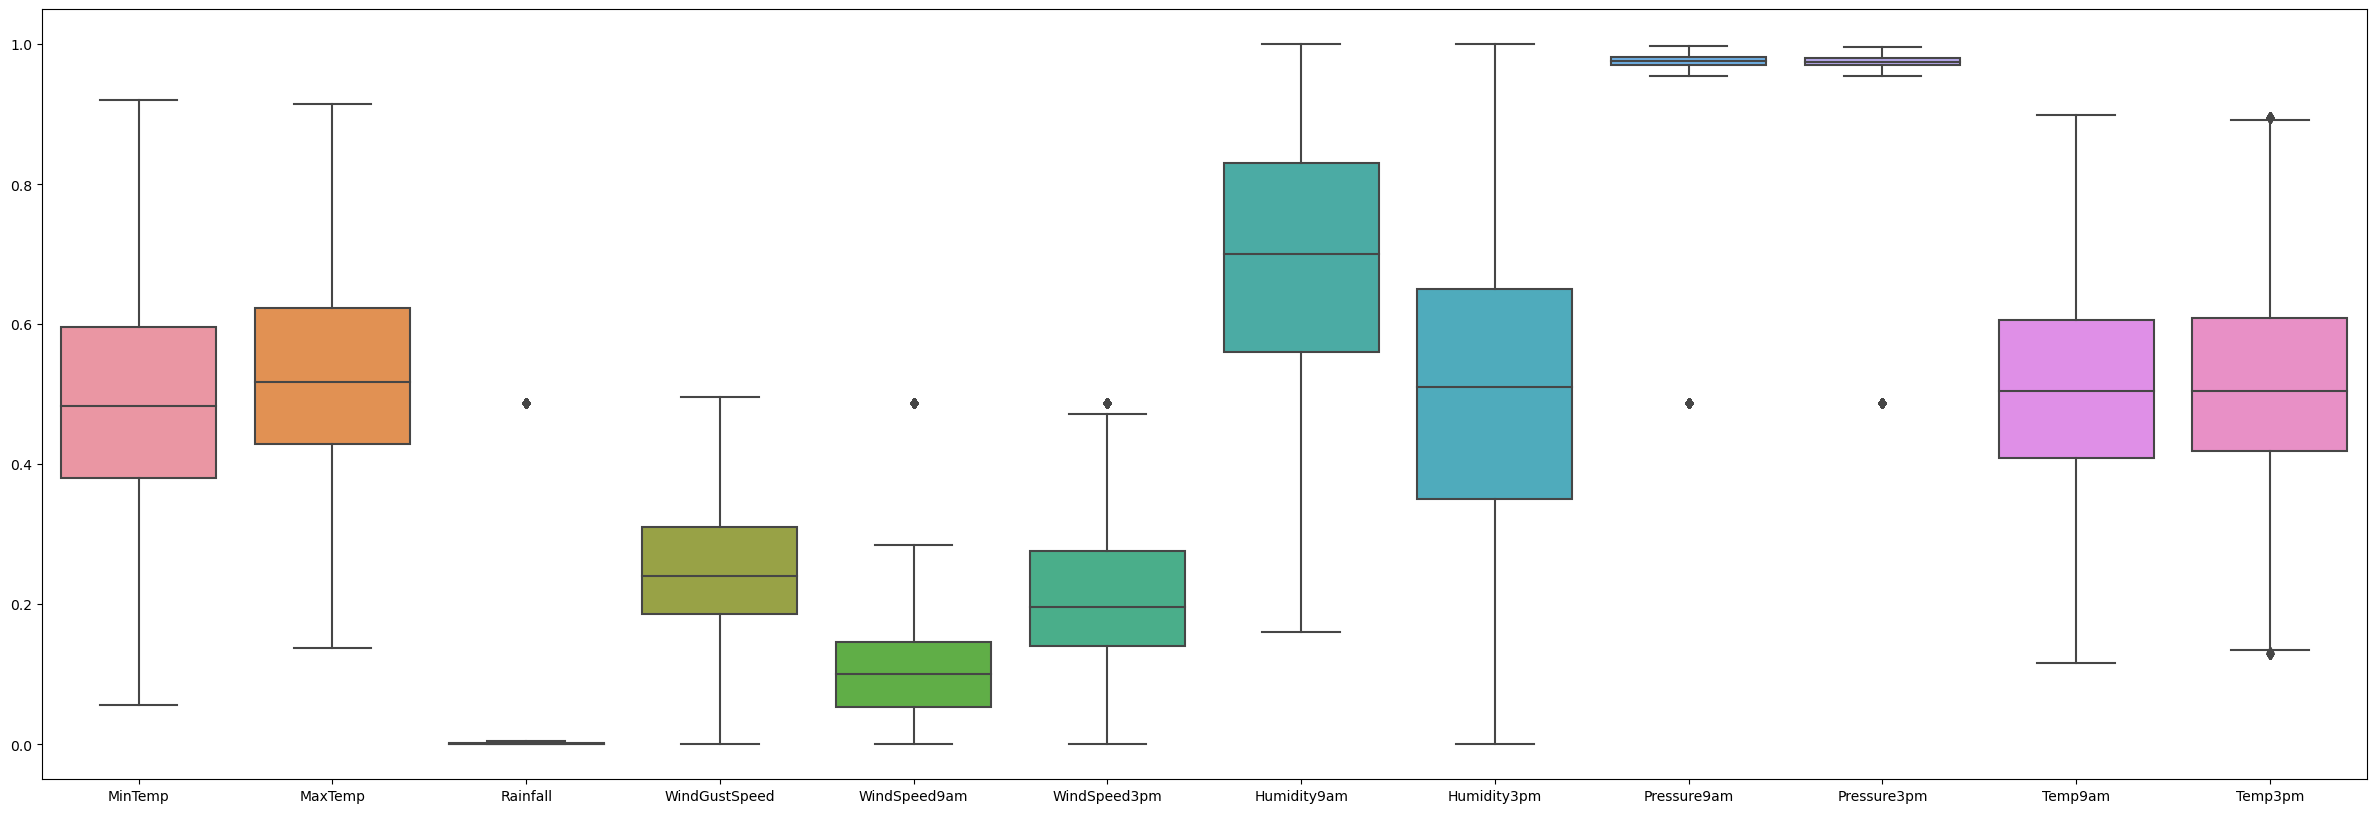

In [50]:
plt.figure(figsize=(30,10))
sns.boxplot(data=cleanedpd)

# Set the labels for the x-axis (column names)
plt.xticks(range(len(cleanedpd.columns)), cleanedpd.columns)

In [51]:
cleanedpd

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.967633,0.968367,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.294574,0.030769,0.252874,0.44,0.25,0.970451,0.969049,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.310078,0.146154,0.298851,0.38,0.30,0.967535,0.969925,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.139535,0.084615,0.103448,0.45,0.16,0.977255,0.973915,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.970646,0.967297,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0.283019,0.502836,0.000000,0.193798,0.115385,0.149425,0.59,0.27,0.984157,0.982091,0.350211,0.504798
140783,0.266509,0.533081,0.000000,0.193798,0.100000,0.126437,0.51,0.24,0.984059,0.981215,0.364979,0.533589
140784,0.285377,0.568998,0.000000,0.124031,0.100000,0.103448,0.56,0.21,0.982990,0.980047,0.381857,0.573896
140785,0.327830,0.599244,0.000000,0.240310,0.069231,0.103448,0.53,0.24,0.980560,0.977808,0.415612,0.604607


In [52]:
dfctg = df_categorical_dummie.reset_index(drop=True)

In [53]:
dfctg

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
#final=pd.concat([dfctg,cleanedpd,rain],axis=1)

In [55]:
#final

In [56]:
rain

,RainToday,RainTomorrow
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
140782,0.0,0.0
140783,0.0,0.0
140784,0.0,0.0
140785,0.0,0.0


In [57]:
joined_df1 = pd.merge(dfctg,cleanedpd ,left_index=True, right_index=True)

In [58]:
joined_df1

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0,1,0,0,0,0,0,0,0,0,...,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.967633,0.968367,0.508439,0.522073
1,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.294574,0.030769,0.252874,0.44,0.25,0.970451,0.969049,0.514768,0.570058
2,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.310078,0.146154,0.298851,0.38,0.30,0.967535,0.969925,0.594937,0.548944
3,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.139535,0.084615,0.103448,0.45,0.16,0.977255,0.973915,0.533755,0.612284
4,0,1,0,0,0,0,0,0,0,0,...,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.970646,0.967297,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.193798,0.115385,0.149425,0.59,0.27,0.984157,0.982091,0.350211,0.504798
140783,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.193798,0.100000,0.126437,0.51,0.24,0.984059,0.981215,0.364979,0.533589
140784,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.124031,0.100000,0.103448,0.56,0.21,0.982990,0.980047,0.381857,0.573896
140785,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.240310,0.069231,0.103448,0.53,0.24,0.980560,0.977808,0.415612,0.604607


In [59]:
joined_df = pd.merge(joined_df1,rain ,left_index=True, right_index=True)
joined_df

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,0,0,0,0,0,0,0,0,...,0.153846,0.275862,0.71,0.22,0.967633,0.968367,0.508439,0.522073,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.030769,0.252874,0.44,0.25,0.970451,0.969049,0.514768,0.570058,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.146154,0.298851,0.38,0.30,0.967535,0.969925,0.594937,0.548944,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.084615,0.103448,0.45,0.16,0.977255,0.973915,0.533755,0.612284,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0.053846,0.229885,0.82,0.33,0.970646,0.967297,0.527426,0.673704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0,0,0,0,0,0,0,0,0,0,...,0.115385,0.149425,0.59,0.27,0.984157,0.982091,0.350211,0.504798,0.0,0.0
140783,0,0,0,0,0,0,0,0,0,0,...,0.100000,0.126437,0.51,0.24,0.984059,0.981215,0.364979,0.533589,0.0,0.0
140784,0,0,0,0,0,0,0,0,0,0,...,0.100000,0.103448,0.56,0.21,0.982990,0.980047,0.381857,0.573896,0.0,0.0
140785,0,0,0,0,0,0,0,0,0,0,...,0.069231,0.103448,0.53,0.24,0.980560,0.977808,0.415612,0.604607,0.0,0.0


In [60]:

joined_df['RainToday'] = joined_df['RainToday'].astype(int)
joined_df['RainTomorrow'] = joined_df['RainTomorrow'].astype(int)
final=joined_df
final

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,0,0,0,0,0,0,0,0,...,0.153846,0.275862,0.71,0.22,0.967633,0.968367,0.508439,0.522073,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0.030769,0.252874,0.44,0.25,0.970451,0.969049,0.514768,0.570058,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0.146154,0.298851,0.38,0.30,0.967535,0.969925,0.594937,0.548944,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0.084615,0.103448,0.45,0.16,0.977255,0.973915,0.533755,0.612284,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0.053846,0.229885,0.82,0.33,0.970646,0.967297,0.527426,0.673704,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0,0,0,0,0,0,0,0,0,0,...,0.115385,0.149425,0.59,0.27,0.984157,0.982091,0.350211,0.504798,0,0
140783,0,0,0,0,0,0,0,0,0,0,...,0.100000,0.126437,0.51,0.24,0.984059,0.981215,0.364979,0.533589,0,0
140784,0,0,0,0,0,0,0,0,0,0,...,0.100000,0.103448,0.56,0.21,0.982990,0.980047,0.381857,0.573896,0,0
140785,0,0,0,0,0,0,0,0,0,0,...,0.069231,0.103448,0.53,0.24,0.980560,0.977808,0.415612,0.604607,0,0


In [61]:
final.to_csv("final.csv",index=False)

In [62]:
x=final.drop('RainTomorrow',axis=1)
y=final['RainTomorrow']


In [63]:
y.value_counts()

0    109530
1     31193
Name: RainTomorrow, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

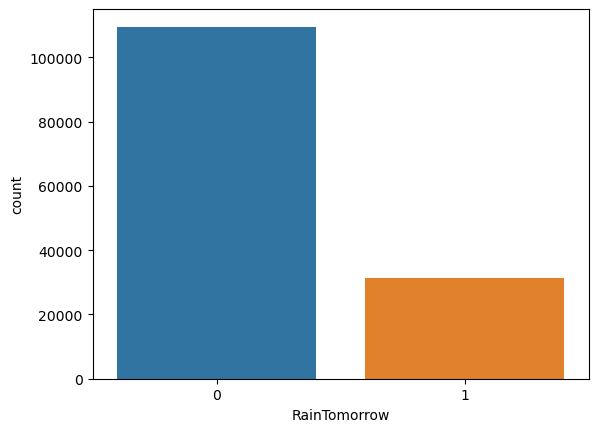

In [64]:
sns.countplot(x=y)

In [65]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [66]:
y.value_counts()

0    109530
1    109530
Name: RainTomorrow, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

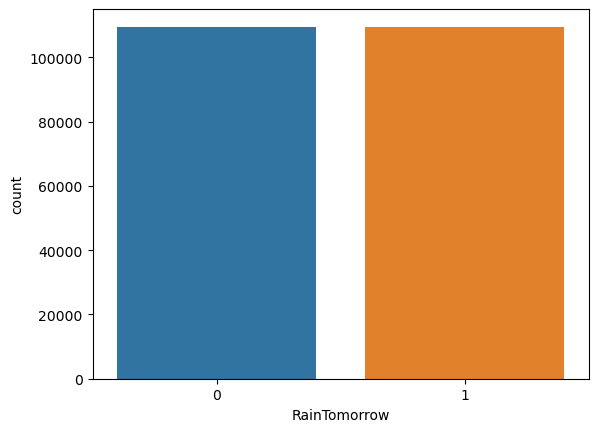

In [67]:
sns.countplot(x=y)

In [68]:
x

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0,1,0,0,0,0,0,0,0,0,...,0.294574,0.153846,0.275862,0.710000,0.220000,0.967633,0.968367,0.508439,0.522073,0
1,0,1,0,0,0,0,0,0,0,0,...,0.294574,0.030769,0.252874,0.440000,0.250000,0.970451,0.969049,0.514768,0.570058,0
2,0,1,0,0,0,0,0,0,0,0,...,0.310078,0.146154,0.298851,0.380000,0.300000,0.967535,0.969925,0.594937,0.548944,0
3,0,1,0,0,0,0,0,0,0,0,...,0.139535,0.084615,0.103448,0.450000,0.160000,0.977255,0.973915,0.533755,0.612284,0
4,0,1,0,0,0,0,0,0,0,0,...,0.271318,0.053846,0.229885,0.820000,0.330000,0.970646,0.967297,0.527426,0.673704,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219055,0,0,0,0,0,0,0,0,0,0,...,0.193798,0.124203,0.106812,0.838415,0.810976,0.487989,0.487989,0.640681,0.527082,0
219056,0,0,0,0,0,0,0,0,0,0,...,0.402691,0.138868,0.368424,0.841562,0.722116,0.967693,0.971809,0.358660,0.343270,1
219057,0,0,0,0,0,0,0,0,0,0,...,0.284680,0.126518,0.126437,0.895164,0.752763,0.968571,0.968484,0.632197,0.604613,0
219058,0,0,0,0,0,0,0,0,0,0,...,0.389207,0.200000,0.348516,0.756039,0.586605,0.976725,0.975309,0.417522,0.403976,0


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [70]:
y_train

57763     0
150787    1
160203    1
16321     0
42282     0
         ..
139352    0
89600     0
218228    1
3101      1
203750    1
Name: RainTomorrow, Length: 175248, dtype: int32

### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')

In [68]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [69]:
train_pred=model.predict(x_test)
train_pred

array([0, 1, 1, ..., 1, 0, 0])

In [70]:
from sklearn.metrics import accuracy_score
print (accuracy_score(train_pred,y_test))

0.804482790103168


In [72]:
from sklearn.metrics import mean_absolute_error
logisticmae = mean_absolute_error(train_pred,y_test)
print(logisticmae)

0.1955172098968319


In [73]:
from sklearn.metrics import f1_score
f1_score(y_test, train_pred)

0.8027539836050475

In [74]:
from sklearn.metrics import precision_score
precision_score(y_test, train_pred)

0.8059087336446438

#### Logit

In [75]:
import statsmodels.api as sm
import pandas as pd
#X = sm.add_constant(X)  # Add a constant column for the intercept
model1 = sm.Logit(y_train, x_train)
result = model1.fit()


Optimization terminated successfully.
         Current function value: 0.418322
         Iterations 7


In [76]:
def backward_elimination(X, y, significance_level=0.05):
    num_vars = X.shape[1]
    for i in range(0, num_vars):
        model2 = sm.Logit(y, X).fit()
        max_p_value = max(model2.pvalues)  # Find the highest p-value
        if max_p_value > significance_level:
            max_idx = model2.pvalues.idxmax()  # Find the index of the predictor variable with the highest p-value
            X = X.drop(max_idx, axis=1)  # Remove the predictor variable with the highest p-value
        else:
            break  # Exit the loop if all predictor variables are significant
    return model2

final_model = backward_elimination(x_train, y_train)


Optimization terminated successfully.
         Current function value: 0.418322
         Iterations 7


In [77]:
print(final_model.summary())


                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:               175248
Model:                          Logit   Df Residuals:                   175142
Method:                           MLE   Df Model:                          105
Date:                Sun, 09 Jul 2023   Pseudo R-squ.:                  0.3965
Time:                        11:05:33   Log-Likelihood:                -73310.
converged:                       True   LL-Null:                   -1.2147e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Location_Albany              -1.1090      0.055    -20.109      0.000      -1.217      -1.001
Location_Albury              -2.3285      0.058    -39.894      0.000      -2.443     

In [78]:
predictions = final_model.predict(x_test)

In [79]:
predictions

55952     0.078851
146842    0.834365
150568    0.974666
212958    0.555062
129092    0.308317
            ...   
49319     0.175993
214271    0.691638
72970     0.742044
55277     0.075530
212855    0.429898
Length: 43812, dtype: float64

In [80]:
binary_predictions = (predictions >= 0.5).astype(int)


In [81]:
binary_predictions

55952     0
146842    1
150568    1
212958    1
129092    0
         ..
49319     0
214271    1
72970     1
55277     0
212855    0
Length: 43812, dtype: int32

In [82]:
from sklearn.metrics import accuracy_score
print (accuracy_score(binary_predictions,y_test))

0.8041175933534191


In [83]:
from sklearn.metrics import mean_absolute_error
logitmae = mean_absolute_error(binary_predictions,y_test)

# uncomment following line to see the validation_mae
print(logitmae)

0.19588240664658085


In [84]:
f1_score(y_test, binary_predictions)

0.8023582515775413

In [85]:
precision_score(y_test, binary_predictions)

0.8056236414928548

### Random Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


In [87]:
iowa = DecisionTreeClassifier(random_state=1)
# Fit iowa_model with the training data.
iowa.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [88]:
val_predictions = iowa.predict(x_test)

In [89]:
val_predictions

array([0, 1, 1, ..., 1, 0, 1])

In [90]:
print (accuracy_score(val_predictions,y_test))

0.8324659910526796


In [92]:
print ('mae = ',mean_absolute_error(val_predictions,y_test))
print ('f1 score = ',f1_score(y_test, val_predictions))
print ('precision score = ',precision_score(y_test, val_predictions))


mae =  0.16753400894732037
f1 score =  0.8333257641128116
precision score =  0.825082063042403


### ANN Single Layer

In [93]:
from sklearn.linear_model import Perceptron

In [94]:
per=Perceptron(random_state=40)
per.fit(x_train,y_train)

Perceptron(random_state=40)

In [97]:
Y_pred = per.predict(x_test)
Y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [96]:
print (accuracy_score(Y_pred,y_test))

0.7262850360631791


In [98]:
print ('mae = ',mean_absolute_error(Y_pred,y_test))
print ('f1 score = ',f1_score(y_test, Y_pred))
print ('precision score = ',precision_score(y_test, Y_pred))

mae =  0.273714963936821
f1 score =  0.75832325675131
precision score =  0.6762517522734625


### ANN Multi Layer

In [99]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000)

In [100]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000)

In [101]:
ann_pred=mlp.predict(x_test)

In [102]:
print (accuracy_score(ann_pred,y_test))

0.8547886423810828


In [103]:
print ('mae = ',mean_absolute_error(ann_pred,y_test))
print ('f1 score = ',f1_score(y_test, ann_pred))
print ('precision score = ',precision_score(y_test, ann_pred))

mae =  0.14521135761891718
f1 score =  0.8508533383345835
precision score =  0.8700676032027617


### ANN Multi Layer Max Iter 10000

In [86]:
mlp1=MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=10000)

In [87]:
mlp1.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=10000)

In [88]:
ann_pred1=mlp1.predict(x_test)

In [89]:
print (accuracy_score(ann_pred1,y_test))

0.8532822057883684


### Random Forrest

In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_depth=40, random_state=1)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, n_estimators=1000, random_state=1)

In [105]:
predictionsrf = model.predict(x_test)

In [126]:
print (accuracy_score(predictionsrf,y_test))

0.8921071852460513


In [71]:
modelT = RandomForestClassifier(n_estimators=1000, max_depth=40, random_state=1)
modelT.fit(x, y)

RandomForestClassifier(max_depth=40, n_estimators=1000, random_state=1)

In [74]:
from sklearn.metrics import mean_absolute_error
logisticrf = mean_absolute_error(predictionsrf,y_test)

# uncomment following line to see the validation_mae
print(logisticrf)

0.10606683100520406


In [ ]:
model.fit(x_train, y_train)

In [107]:
print ('mae = ',mean_absolute_error(predictionsrf,y_test))
print ('f1 score = ',f1_score(y_test, predictionsrf))
print ('precision score = ',precision_score(y_test, predictionsrf))

mae =  0.10789281475394868
f1 score =  0.8927753204037654
precision score =  0.8830207305034551


### Random Forrest Feature Selection

In [108]:
importances = model.feature_importances_
sorted_indices = importances.argsort()[::-1]

In [109]:
n_desired_variables = 12  # Set the desired number of variables
selected_indices = sorted_indices[:n_desired_variables]

In [110]:
selected_features = x_train.iloc[:, selected_indices]
list(selected_features.columns)

['Humidity3pm',
 'Rainfall',
 'Humidity9am',
 'WindGustSpeed',
 'Pressure3pm',
 'Pressure9am',
 'Temp3pm',
 'MinTemp',
 'MaxTemp',
 'WindSpeed3pm',
 'WindSpeed9am',
 'Temp9am']

In [88]:
x_train_new=x_train[['Humidity3pm',
 'Rainfall',
 'Humidity9am',
 'WindGustSpeed',
 'Pressure3pm',
 'Pressure9am',
 'Temp3pm']]

In [142]:
model1 = RandomForestClassifier(max_depth=40, random_state=1)
model1.fit(x_train_new, y_train)

RandomForestClassifier(max_depth=40, random_state=1)

In [89]:
x_test_new=x_test[['Humidity3pm',
 'Rainfall',
 'Humidity9am',
 'WindGustSpeed',
 'Pressure3pm',
 'Pressure9am',
 'Temp3pm']]

In [144]:
predictions = model1.predict(x_test_new)

In [145]:
print (accuracy_score(predictions,y_test))

0.8709714233543322


In [117]:
print ('mae = ',mean_absolute_error(predictions,y_test))
print ('f1 score = ',f1_score(y_test, predictions))
print ('precision score = ',precision_score(y_test, predictions))

mae =  0.11802702455948141
f1 score =  0.8809759465991484
precision score =  0.88408943915735


### Logistic Regression with Feature Selection

In [118]:
lrl=LogisticRegression(solver='sag')

In [119]:
lrl.fit(x_train_new,y_train)

LogisticRegression(solver='sag')

In [120]:
predictionslr1 =lrl.predict(x_test_new)

In [121]:
print (accuracy_score(predictionslr1,y_test))

0.7555464256368118


In [122]:
print ('mae = ',mean_absolute_error(predictionslr1,y_test))
print ('f1 score = ',f1_score(y_test, predictionslr1))
print ('precision score = ',precision_score(y_test, predictionslr1))

mae =  0.24445357436318818
f1 score =  0.7530209390277649
precision score =  0.7571064224437747


In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,predictionsrf)
confusion_matrix

array([[19406,  2607],
       [ 2120, 19679]], dtype=int64)

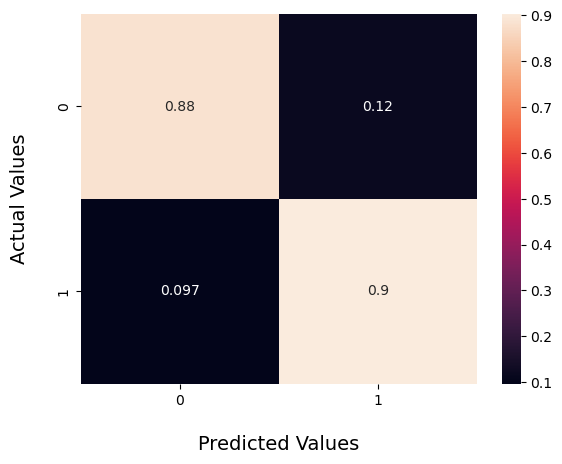

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(y_test, predictionsrf, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel("Predicted Values", fontsize=14, labelpad=20)
plt.ylabel("Actual Values", fontsize=14, labelpad=20)
plt.show()


In [ ]:
print(model.intercept_)

In [ ]:
weightsdf=pd.DataFrame({'feature':numeric_cols+encoded_cols, 'coef' :model.coef_.tolist()[0]})
weightsdf

In [ ]:
plt.figure(figsize=(10,50))
sns.barplot(data=weightsdf,x='coef',y='feature')

In [138]:
importances = model.feature_importances_
importances

array([0.00190753, 0.00121487, 0.0011771 , 0.00136705, 0.00145648,
       0.00134098, 0.00147399, 0.00105934, 0.00169675, 0.00118521,
       0.00181941, 0.0016133 , 0.00091871, 0.00126509, 0.00168425,
       0.00055409, 0.001547  , 0.00114086, 0.00146104, 0.00146558,
       0.00113187, 0.00144803, 0.00118913, 0.00074596, 0.00090078,
       0.00203685, 0.00162809, 0.00135663, 0.00103071, 0.00101809,
       0.00121098, 0.00115157, 0.00171628, 0.00138737, 0.00170812,
       0.00121345, 0.00194803, 0.00154785, 0.00105582, 0.00132091,
       0.00052454, 0.00132905, 0.00155629, 0.00150638, 0.00135613,
       0.00158125, 0.0022052 , 0.00182508, 0.00218203, 0.00218142,
       0.00350567, 0.00252483, 0.00256787, 0.00262137, 0.00287932,
       0.00274947, 0.00257192, 0.00252211, 0.00280503, 0.00271822,
       0.00412964, 0.00266806, 0.00267913, 0.00227698, 0.00241303,
       0.00509178, 0.00270368, 0.00379413, 0.00281144, 0.00312036,
       0.00300111, 0.00284154, 0.00266363, 0.0027841 , 0.00304

In [72]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [86]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [91]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train_new, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [92]:
y_predxg = xgb_classifier.predict(x_test_new)

In [93]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predxg)
print("Accuracy:", accuracy)

Accuracy: 0.8948233360723089


In [94]:
from sklearn.metrics import mean_absolute_error
xgb = mean_absolute_error(y_predxg,y_test)

# uncomment following line to see the validation_mae
print(xgb)

0.10517666392769104


In [95]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [96]:
print ('mae = ',mean_absolute_error(y_predxg,y_test))
print ('f1 score = ',f1_score(y_test, y_predxg))
print ('precision score = ',precision_score(y_test, y_predxg))

mae =  0.10517666392769104
f1 score =  0.8910947249007375
precision score =  0.927755905511811


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_predxg)
confusion_matrix

array([[20435,  1385],
       [ 2767, 19225]], dtype=int64)

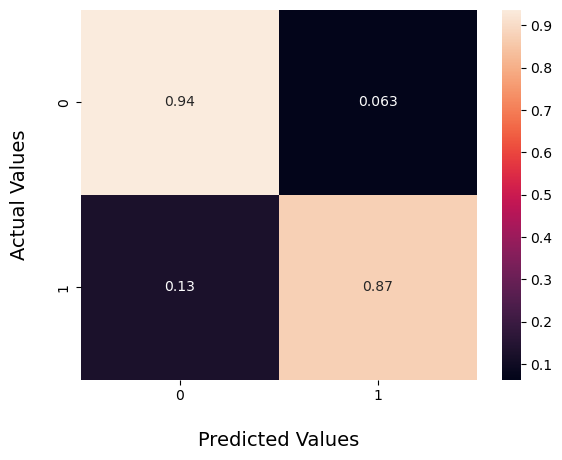

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(y_test, y_predxg, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel("Predicted Values", fontsize=14, labelpad=20)
plt.ylabel("Actual Values", fontsize=14, labelpad=20)
plt.show()